# Introduction to Pandas for Data Science

Welcome to this tutorial on Pandas, a powerful library for data manipulation and analysis in Python. In this notebook, we'll explore how Pandas can be used in statistical analysis and data science, covering the basics from data loading to essential operations.

## What is Pandas?

Pandas is an open-source Python library providing high-performance, easy-to-use data structures, and data analysis tools. It's built on top of NumPy and integrates well with other libraries like Matplotlib and SciPy.

## Why Use Pandas in Statistics?

- **Data Handling**: Efficiently read and write data from various formats (CSV, Excel, SQL databases).
- **Data Manipulation**: Clean, transform, and merge datasets with ease.
- **Statistical Analysis**: Compute descriptive statistics and perform operations like grouping and aggregation.
- **Visualization**: Integrate with plotting libraries to visualize data trends.

---

# Getting Started

Let's begin by importing the Pandas library.

In [1]:
import pandas as pd

# Pandas Data Structures

Pandas introduces two primary data structures:

- **Series**: One-dimensional labeled array capable of holding any data type.
- **DataFrame**: Two-dimensional labeled data structure with columns of potentially different types.

## Creating a Series

In [2]:
# Creating a Series from a list
import pandas as pd

data = [10, 20, 30, 40]
s = pd.Series(data)
print(s)

0    10
1    20
2    30
3    40
dtype: int64


## Creating a DataFrame

In [3]:
# Creating a DataFrame from a dictionary
data = {
    'Age': [25, 30, 35, 40],
    'Name': ['Alice', 'Bob', 'Charlie', 'David']
}
df = pd.DataFrame(data)
print(df)

   Age     Name
0   25    Alice
1   30      Bob
2   35  Charlie
3   40    David


---

# Saving Data

After manipulating data, you might want to save it back to a file.

In [7]:
# Saving to CSV
df.to_csv('data.csv', index=False)
#df.to_csv('data.csv.gz', index=False)

---

# Reading Data from Files

Pandas can read data from various file formats. The most common is CSV.

## Reading CSV Files

CSV (Comma-Separated Values) files are one of the most common file formats for storing tabular data. Pandas provides the `read_csv` function to read CSV files.

In [8]:
# Reading data from a CSV file
df_csv = pd.read_csv('data.csv')
print(df_csv.head())

   Age     Name
0   25    Alice
1   30      Bob
2   35  Charlie
3   40    David


## Reading Compressed CSV Files

Pandas can directly read compressed files (e.g., `.gz`, `.bz2`, `.zip`, `.xz`). If your data is in a compressed CSV file, you can read it without decompressing it first. Pandas will automatically detect the compression based on the file extension.

In [ ]:
# Reading data from a compressed CSV file
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
df_csv_gz = pd.read_csv('data.csv.gz')
print(df_csv_gz.head())

## Example Dataset

For this tutorial, we'll use a sample dataset about students' scores.

In [20]:
# Sample data
data = {
    'Student': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Math': [85, 78, 90, 95, 88],
    'English': [92, 76, 88, 85, 91],
    'Science': [89, 80, 86, 94, 90]
}
df = pd.DataFrame(data)
print(df)

   Student  Math  English  Science
0    Alice    85       92       89
1      Bob    78       76       80
2  Charlie    90       88       86
3    David    95       85       94
4      Eva    88       91       90


---

# Basic Data Exploration

## Viewing Data

- **Head and Tail**: View the first or last few rows.

In [11]:
print(df.head(3))    # First 5 rows
# print(df.tail(3))   # Last 3 rows

   Student  Math  English  Science
0    Alice    85       92       89
1      Bob    78       76       80
2  Charlie    90       88       86


## Summary Statistics

In [12]:
print(df.describe())

            Math    English    Science
count   5.000000   5.000000   5.000000
mean   87.200000  86.400000  87.800000
std     6.300794   6.426508   5.215362
min    78.000000  76.000000  80.000000
25%    85.000000  85.000000  86.000000
50%    88.000000  88.000000  89.000000
75%    90.000000  91.000000  90.000000
max    95.000000  92.000000  94.000000


## Data Types

In [13]:
print(df.dtypes)

Student    object
Math        int64
English     int64
Science     int64
dtype: object


---

# Data Selection and Indexing

## Selecting Columns

In [14]:
# Selecting a single column
math_scores = df['Math']
print(math_scores)

0    85
1    78
2    90
3    95
4    88
Name: Math, dtype: int64


## Selecting Multiple Columns

In [15]:
# Selecting multiple columns
scores = df[['Student', 'Math', 'Science']]
print(scores)

   Student  Math  Science
0    Alice    85       89
1      Bob    78       80
2  Charlie    90       86
3    David    95       94
4      Eva    88       90


## Row Selection

### By Label with `.loc`

In [21]:
# Selecting rows by label
df2 = df.set_index('Student')
row = df2.loc['Charlie']
print(row)

Math       90
English    88
Science    86
Name: Charlie, dtype: int64


In [22]:
df2

,Math,English,Science
Student,,,
Alice,85,92,89
Bob,78,76,80
Charlie,90,88,86
David,95,85,94
Eva,88,91,90


### By Position with `.iloc`

In [17]:
# Selecting rows by integer location
row = df.iloc[2]
print(row)

Student    Charlie
Math            90
English         88
Science         86
Name: 2, dtype: object


## Conditional Selection

In [23]:
# Students with Math score above 85
high_math = df[df['Math'] > 85]
print(high_math)

   Student  Math  English  Science
2  Charlie    90       88       86
3    David    95       85       94
4      Eva    88       91       90


---

# Data Manipulation

## Adding New Columns

In [24]:
# Calculating the average score
df['Average'] = df[['Math', 'English', 'Science']].mean(axis=1)
print(df)

   Student  Math  English  Science    Average
0    Alice    85       92       89  88.666667
1      Bob    78       76       80  78.000000
2  Charlie    90       88       86  88.000000
3    David    95       85       94  91.333333
4      Eva    88       91       90  89.666667


## Renaming Columns

In [25]:
# Renaming the 'Student' column to 'Name'
df.rename(columns={'Student': 'Name'}, inplace=True)
print(df)

      Name  Math  English  Science    Average
0    Alice    85       92       89  88.666667
1      Bob    78       76       80  78.000000
2  Charlie    90       88       86  88.000000
3    David    95       85       94  91.333333
4      Eva    88       91       90  89.666667


## Handling Missing Data

In [30]:
# Let's introduce some missing data
df.loc[2, 'Science'] = None

# Checking for null values
print(df.isnull())

# # Filling missing values with the mean
df['Science'].fillna(df['Science'].mean(), inplace=True)
print(df)

    Name   Math  English  Science  Average
0  False  False    False    False    False
1  False  False    False    False    False
2  False  False    False     True    False
3  False  False    False    False    False
4  False  False    False    False    False
      Name  Math  English  Science    Average
0    Alice    85       92    89.00  88.666667
1      Bob    78       76    80.00  78.000000
2  Charlie    90       88    88.25  88.000000
3    David    95       85    94.00  91.333333
4      Eva    88       91    90.00  89.666667


<ipython-input-30-e8b8a34abdad>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Science'].fillna(df['Science'].mean(), inplace=True)


---

# Grouping and Aggregating Data

## Group By

Suppose we have an additional column for class section.

In [31]:
df['Section'] = ['A', 'B', 'A', 'B', 'A']
print(df)

      Name  Math  English  Science    Average Section
0    Alice    85       92    89.00  88.666667       A
1      Bob    78       76    80.00  78.000000       B
2  Charlie    90       88    88.25  88.000000       A
3    David    95       85    94.00  91.333333       B
4      Eva    88       91    90.00  89.666667       A


### Calculating Grouped Statistics

In [34]:
# Average scores by section
grouped = df[["Math",  "English",  "Science","Section"]].groupby('Section').mean()
print(grouped)

              Math    English    Science
Section                                 
A        87.666667  90.333333  89.083333
B        86.500000  80.500000  87.000000


---

# Data Visualization with Pandas

Pandas integrates well with Matplotlib for plotting.

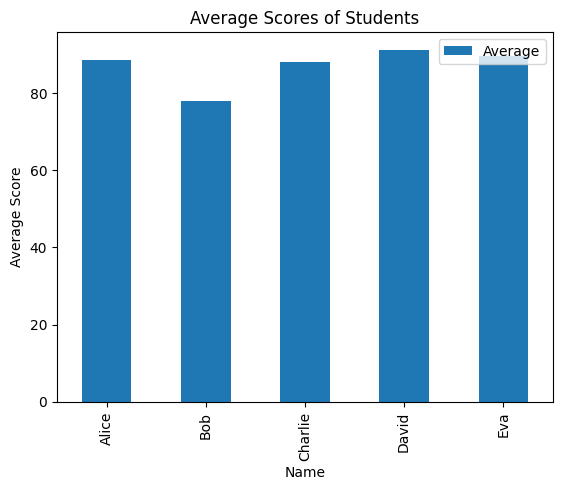

In [35]:
import matplotlib.pyplot as plt

# Plotting the average scores
df.plot(x='Name', y='Average', kind='bar')
plt.ylabel('Average Score')
plt.title('Average Scores of Students')
plt.show()

---

# Practical Example: Analyzing a Dataset

Let's work through a practical example using a real dataset.

## Loading the Titanic Dataset

The Titanic dataset is a classic in data science.

In [36]:
# Load dataset directly from seaborn library
import seaborn as sns

titanic = sns.load_dataset('titanic')
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## Exploring the Data

In [37]:
# Basic info
print(titanic.info())

# Statistical summary
print(titanic.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parch        f

## Cleaning the Data

In [38]:
# Drop unnecessary columns
titanic.drop(columns=['deck', 'embark_town'], inplace=True)

# Fill missing age values with the median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

<ipython-input-38-35657a193c4b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


## Analysis: Survival Rate by Gender

In [39]:
# Survival rate by gender
survival_by_gender = titanic.groupby('sex')['survived'].mean()
print(survival_by_gender)

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


## Visualization

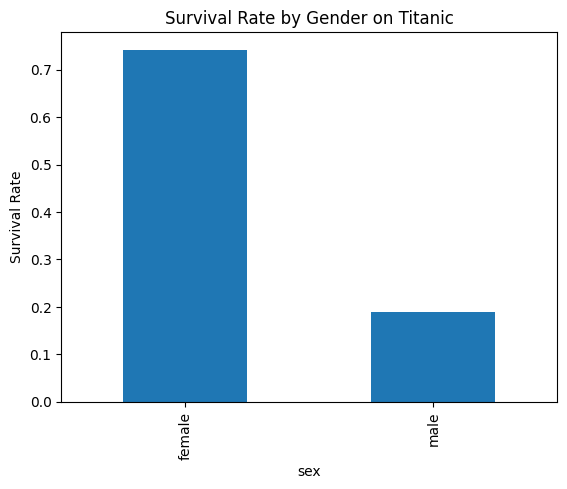

In [40]:
# Bar plot of survival rate by gender
survival_by_gender.plot(kind='bar')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender on Titanic')
plt.show()

---

# Conclusion

In this tutorial, we've covered:

- The basics of Pandas data structures: Series and DataFrame.
- Reading data from files, including CSV and compressed CSV files.
- Exploring and summarizing data.
- Data selection, indexing, and manipulation.
- Grouping and aggregating data.
- Basic data visualization.

Pandas is an essential tool in a data scientist's toolkit, enabling efficient data analysis and manipulation. As you progress, you'll discover more advanced features and integrations with other libraries.

# Additional Resources

- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [10 Minutes to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)

Feel free to experiment with the code and explore datasets relevant to your interests!